In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import resource
import sys
from IPython.display import display

from ggqpy.functionfamiliy import Interval
from ggqpy.testproblems import example_problem, gen_poly_and_sing
from ggqpy.discretize import adaptive_discretization
from ggqpy.compress import compress_sequence_of_functions, construct_Chebyshev_quadratures, visualise_diagonal_dropoff
from ggqpy.optimize import QuadOptimizer

resource.setrlimit(resource.RLIMIT_STACK, [0x10000000, resource.RLIM_INFINITY])
sys.setrecursionlimit(0x100000)

ImportError: cannot import name 'adaptive_discretization' from 'ggqpy.discretize' (/home/jakob/Documents/OneDriveDTU/10-semester/speciale/code/ggqpy/discretize.py)

In [ ]:
eps_disc = 1e-10
eps_comp = 1e2*eps_disc
eps_quad = 1e-2
I = Interval(1e-6,1)
seed = 1

Example function from function space


-1.42071812593784*x**10 + 3.08140815864662*x**9 + 4.09987411719436*x**8 + 0.961706643287767*x**7 + 0.562583299664027*x**6 + 2.37138542381624*x**5 - 3.46160081096422*x**4 + 2.08080776889258*x**3 - 7.43488945436432*x**2 - 1.89035518730442*x + 6.50141760280507 - 2.15579638264776/x

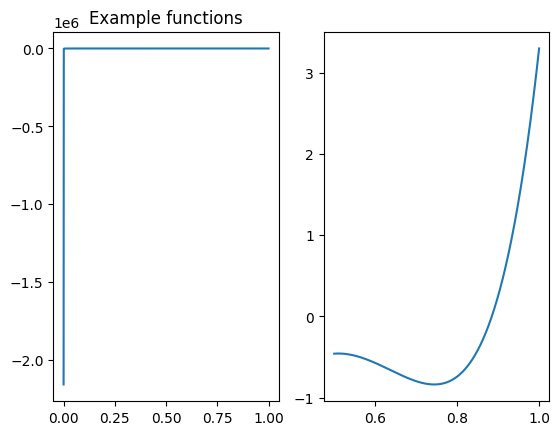

In [ ]:
rng_gen = np.random.default_rng(seed)
F = example_problem(I, number_of_functions = 100, expr_gen=gen_poly_and_sing)
ex_f, ex_f_expr = F.generate_example_function()

print("Example function from function space")
display(ex_f_expr)
xx = np.linspace(I.a,I.b,1000)
functions_to_plot = 5
plt.subplot(1, 2, 1)
plt.title("Example functions")
plt.plot(xx,ex_f(xx))
plt.subplot(1, 2, 2);
xx2 = np.linspace((I.a+I.b)/2,I.b,1000)
plt.plot(xx2,ex_f(xx2));

Discretization and compression

In [ ]:
k = 30
x_disc, w_disc, endpoints, intervals = adaptive_discretization(F, eps_disc, k, verbose=False)
U_disc, A, rank, u_list = compress_sequence_of_functions(F, x_disc, w_disc, eps_comp, k, intervals)

Functions before compression: 100
Functions after compression: 12


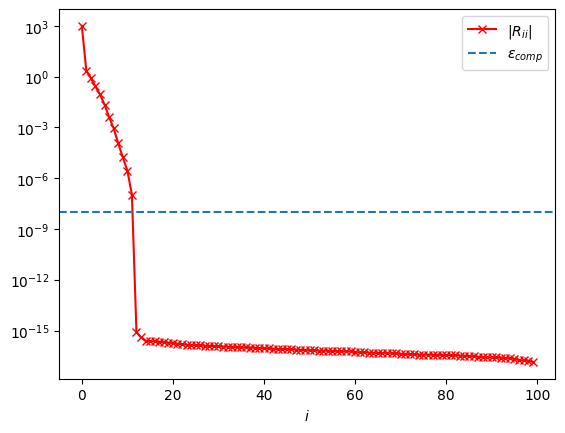

In [ ]:
print("Functions before compression:", len(F.functions))
print("Functions after compression:", len(u_list))
visualise_diagonal_dropoff(A, eps_comp)

Chebyshev Rule

In [ ]:
x_cheb, w_cheb, idx_cheb = construct_Chevyshev_quadratures(x_disc,w_disc,U_disc)

In [ ]:
print("Number of points in original discretization:", len(x_disc))
print("Number of points in Chebyshev rule:", len(x_cheb))
print("Absolute integral error for chebyshev:", abs(F.target_integral(ex_f_expr)-ex_f(x_cheb)@w_cheb))

Number of points in original discretization: 1140
Number of points in Chebyshev rule: 12
Absolute integral error for chebyshev: 9.94759830064140e-14


Naive nonlinear optimization

In [ ]:
r = U_disc.T@w_disc

In [ ]:
opt = QuadOptimizer(u_list,r)
opt.set_parameters(0.8,100,1e-6)
x_naive, w_naive = opt.naive_optimization(6, F.I)

In [ ]:
print("Naive quadrature length: ", len(x_naive))
print("Naive error:", abs(F.target_integral(ex_f_expr)-ex_f(x_naive)@w_naive))

Naive quadrature length:  6
Naive error: 19.5890235393717


In [ ]:
opt = QuadOptimizer(u_list,r)
opt.set_parameters(0.8,100,1e-6)
r = U_disc.T@w_disc
x,w = opt.point_reduction(x_cheb, w_cheb, eps_quad)

[0.0, 0.043879640303730316, 0.20111237197311413, 0.3272060497205679, 2.5714838387212655, 3.5649600103830466, 12.40961370621533, 69.76257192792066, 1601.8143692503093, 97781.08620974433, 155890.91470162704, 58432235.61727142]
[0.0, 0.07919709913830889, 0.15430786965109516, 0.33352724264940936, 0.4544527910292611, 2.634037265070009, 8.847559070127877, 75.1759268972848, 713.4533724725927, 2036.4588684339735, 202582.86121270186]
No improvement found
[0.0, 0.08614017807148779, 0.20458399422825604, 0.21430392694764647, 0.35415974218571405, 1.1527183498431222, 2.8147242584601644, 24.794279354976194, 80.24959405405845, 3865.8045801237176]
No improvement found
No improvement found
No improvement found
[0.0, 0.08602480924768016, 0.20495024817376908, 0.22599996877444412, 0.3315782142303195, 0.39006830810133497, 1.1583948476165948, 2.29574506607771, 132.58027934726863]
No improvement found
No improvement found
No improvement found
No improvement found
[0.0, 0.08586364844076463, 0.2027761918086272,

In [ ]:
print("Quadrature length: ", len(x))
print("Absolute error:", abs(F.target_integral(ex_f_expr)-ex_f(x)@w))

Quadrature length:  6
Absolute error: 2.87665216092137e-8
